<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/MN_Gen_Alg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#algoritmo genetico
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def aptitud(c):#c es una permutacion de (1,2,...,N)
    N=len(c)
    #La reina i esta en (i,c[i]).
    num_amenazas=[]
    amenazas=[]
    for i in range(N):
        amenazas_i=[]
        num_amenazas_i=0
        for j in range(N):
            if(i!=j and abs(c[i]-c[j])==abs(i-j)):
                num_amenazas_i+=1
                amenazas_i.append(j+1)
        num_amenazas.append(num_amenazas_i)
        amenazas.append(amenazas_i)
    return amenazas
    

[1 4 2 8 7 6 3 5]


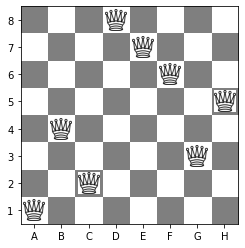

In [4]:
import matplotlib.pyplot as plt
import numpy as np
nrows, ncols = 8,8
board = np.zeros((8,8,3))
board += 0.5 # "Black" color
board[::2, ::2] = 1 # "White" color
board[1::2, 1::2] = 1 # "White" color
positions =np.array([1, 4, 2, 8, 7, 6, 3, 5])-1
#np.random.permutation(range(0,8))
print(np.array(positions)+1)
#fila, columna.
fig, ax = plt.subplots()
ax.imshow(board, interpolation='nearest')

queen = plt.imread('queen.png')
extent = np.array([-0.4, 0.4, -0.4, 0.4]) # (0.5 would be the full cell)
for y, x in enumerate(positions):
    ax.imshow(queen, extent=extent + [y, y, x, x])
col_labels=['A','B','C','D','E','F','G','H']
row_labels=range(1,nrows+1)
plt.xticks(range(ncols), col_labels)
plt.yticks(range(nrows), row_labels)
ax.axis('image')

plt.show()

In [185]:
print(aptitud([1, 4, 2, 8, 7, 6, 3, 5]))
def val_aptitud(c):
    valor=0
    for i in range(len(c)):
        valor+=len(c[i])
    return valor/2

[[6], [5], [], [5, 6], [2, 4, 6], [1, 4, 5], [], []]


In [80]:
val_aptitud(aptitud([1, 4, 2, 8, 7, 6, 3, 5]))

5.0

In [192]:
def order_1_crossover(p1,p2):
    temp_p2=np.copy(p2)
    temp_p2=temp_p2.tolist()
    print("p1:",p1)
    print("p2:",p2)
    a1,a2=np.random.permutation(range(1,len(p1)+1))[0:2]
    print("aleatorios:", a1,a2)
    p1_1=p1.index(a1)
    p1_2=p1.index(a2)
    indices=sorted([p1_1,p1_2])
    print("indices", indices)
    hijo=[-1]*len(p1)
    for i in range(indices[0],indices[1]+1):
        hijo[i]=p1[i]
        temp_p2.remove(p1[i])
    
    for j in range(len(p1)):
        if(hijo[j]<0):
            hijo[j]=temp_p2[0]
            temp_p2.remove(hijo[j])

    print("hijo",hijo)
    return(hijo)



In [200]:
def mutation(hijo,mu=0.05):
    mu_r=np.random.uniform(0,1)
    if(mu_r<mu):
        print("hay mutacion")
        a1=np.random.choice(range(1,len(hijo)))
        a2=np.random.choice(range(1,len(hijo)))
        while(a2==a1):
            a2=np.random.choice(range(1,len(hijo)))
   
        print("aleatorios:", hijo[a1],hijo[a2])
        h1=hijo[a1]
        h2=hijo[a2]
        hijo[a1]=h2
        hijo[a2]=h1
    return (hijo)

In [107]:
poblacion=[[6, 3, 1, 7, 5, 8, 4, 2],[1, 4, 2, 8, 7, 6, 3, 5],[8, 7, 5, 3, 4, 6, 1, 2],[4, 1, 3, 6, 7, 5, 2, 8],[3, 7, 1, 5, 8, 6, 2, 4],[4, 6, 2, 5, 1, 7, 8, 3],[1, 5, 4 ,7 ,6 ,3 ,2, 8],[3, 2 ,1 ,7 ,8 ,6, 4, 5]]
def select_padres(poblacion):
    aptitudes=[]
    suma=0
    breakpoints=[]
    for config in poblacion:
        aptitudes.append(val_aptitud(aptitud(config)))
        suma+=aptitudes[-1]
        breakpoints.append(suma)
    breakpoints=np.array(breakpoints)/suma
    breakpoints=np.insert(np.asarray(breakpoints),0,0.0)
    print(breakpoints)
    unif1,unif2=0.7,0.8
    print(unif1)
    for l in range(len(breakpoints)-1):
        if(unif1>breakpoints[l] and unif1<=breakpoints[l+1]):
            print("se selecciona al padre:",l+1)
            break;
    print(aptitudes)


In [193]:
M=int(np.floor(np.sqrt(8)))
print("M",M)
def select_padres(poblacion):
    aptitudes=[]
    suma=0
    breakpoints=[]
    for config in poblacion:
        aptitudes.append(val_aptitud(aptitud(config)))
    posibles_padres=[]
    temp_aptitudes=np.copy(aptitudes)
    temp_aptitudes=temp_aptitudes.tolist()
    for i in range(M):
        max=np.min(temp_aptitudes)
        posibles_padres.append(temp_aptitudes.index(max))
        temp_aptitudes[posibles_padres[-1]]=100
    p1=np.random.choice(posibles_padres)
    print(posibles_padres,"aaa")
    print("pq",p1)
    p2=np.random.choice(posibles_padres)
    while(p2==p1):
        p2=np.random.choice(posibles_padres)
    return ([aptitudes,int(p1),int(p2)])


M 2


In [147]:
np.random.choice([0, 1, 2])

0

In [202]:
poblacion=[[6, 3, 1, 7, 5, 8, 4, 2],[1, 4, 2, 8, 7, 6, 3, 5],[8, 7, 5, 3, 4, 6, 1, 2],[4, 1, 3, 6, 7, 5, 2, 8],[3, 7, 1, 5, 8, 6, 2, 4],[4, 6, 2, 5, 1, 7, 8, 3],[1, 5, 4 ,7 ,6 ,3 ,2, 8],[3, 2 ,1 ,7 ,8 ,6, 4, 5]]
def redefinir(original,deseado):
    for i in range(len(original)):
        original[i]=deseado[i]
    return 0
for i in range(20):
    print(poblacion)
    aptitudes,i1,i2=select_padres(poblacion)
    print(aptitudes)
    print("indices",i1,i2)
    hijo=mutation(order_1_crossover(poblacion[i1],poblacion[i2]),0.1)
    redefinir(poblacion[aptitudes.index(np.max(aptitudes))],hijo)
    print(hijo)
    if(0 in aptitudes):
        print("alv"*20)
        break
    

[[6, 3, 1, 7, 5, 8, 4, 2], [1, 4, 2, 8, 7, 6, 3, 5], [8, 7, 5, 3, 4, 6, 1, 2], [4, 1, 3, 6, 7, 5, 2, 8], [3, 7, 1, 5, 8, 6, 2, 4], [4, 6, 2, 5, 1, 7, 8, 3], [1, 5, 4, 7, 6, 3, 2, 8], [3, 2, 1, 7, 8, 6, 4, 5]]
[0, 3] aaa
pq 0
[2.0, 5.0, 6.0, 3.0, 5.0, 4.0, 6.0, 8.0]
indices 0 3
p1: [6, 3, 1, 7, 5, 8, 4, 2]
p2: [4, 1, 3, 6, 7, 5, 2, 8]
aleatorios: 7 1
indices [2, 3]
hijo [4, 3, 1, 7, 6, 5, 2, 8]
[4, 3, 1, 7, 6, 5, 2, 8]
[[6, 3, 1, 7, 5, 8, 4, 2], [1, 4, 2, 8, 7, 6, 3, 5], [8, 7, 5, 3, 4, 6, 1, 2], [4, 1, 3, 6, 7, 5, 2, 8], [3, 7, 1, 5, 8, 6, 2, 4], [4, 6, 2, 5, 1, 7, 8, 3], [1, 5, 4, 7, 6, 3, 2, 8], [4, 3, 1, 7, 6, 5, 2, 8]]
[0, 3] aaa
pq 0
[2.0, 5.0, 6.0, 3.0, 5.0, 4.0, 6.0, 6.0]
indices 0 3
p1: [6, 3, 1, 7, 5, 8, 4, 2]
p2: [4, 1, 3, 6, 7, 5, 2, 8]
aleatorios: 4 6
indices [0, 6]
hijo [6, 3, 1, 7, 5, 8, 4, 2]
hay mutacion
aleatorios: 8 4
[6, 3, 1, 7, 5, 4, 8, 2]
[[6, 3, 1, 7, 5, 8, 4, 2], [1, 4, 2, 8, 7, 6, 3, 5], [6, 3, 1, 7, 5, 4, 8, 2], [4, 1, 3, 6, 7, 5, 2, 8], [3, 7, 1, 5, 8, 6, 2, 

In [140]:
print(select_padres(poblacion))

[0, 3] aaa
pq []
0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [ ]:
p1=[1, 4, 2, 8, 7, 6, 3, 5]
p2=[6, 3, 1, 7, 5, 8, 4, 2]
order_1_crossover(p1,p2)

p1: [1, 4, 2, 8, 7, 6, 3, 5]
p2: [6, 3, 1, 7, 5, 8, 4, 2]
aleatorios: 2 8
indices [2, 3]
[-1, -1, 2, 8, -1, -1, -1, -1]


[6, 3, 2, 8, 1, 7, 5, 4]